In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [11]:
# Load dataset
df = pd.read_csv("cc_info.csv")

In [12]:
# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB
None

Descriptive Statistics:
        credit_card       zipcode  credit_card_limit
count  9.840000e+02    984.000000         984.000000
mean   5.410432e+15  17895.316057       12321.138211
std    2.545234e+15  23778.651105        7398.449174
min    1.003715e+15    690.000000        2000.000000
25%    3.316062e+15   3280.000000        7000.000000
50%    5.365218e+15   5820.000000       10000.000000
75%    7.562153e+15  18101.250000       16000.000000
max    9.999757e+15  98401.000000       55000.00

In [13]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64


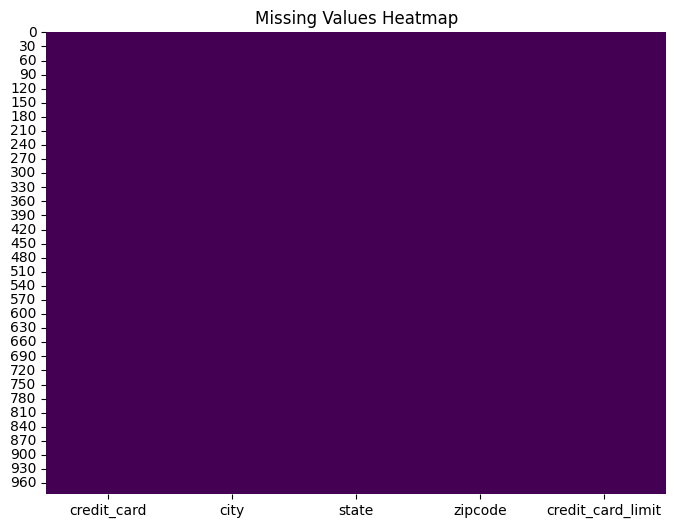

In [14]:
# Visualizing missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

<Figure size 1200x600 with 0 Axes>

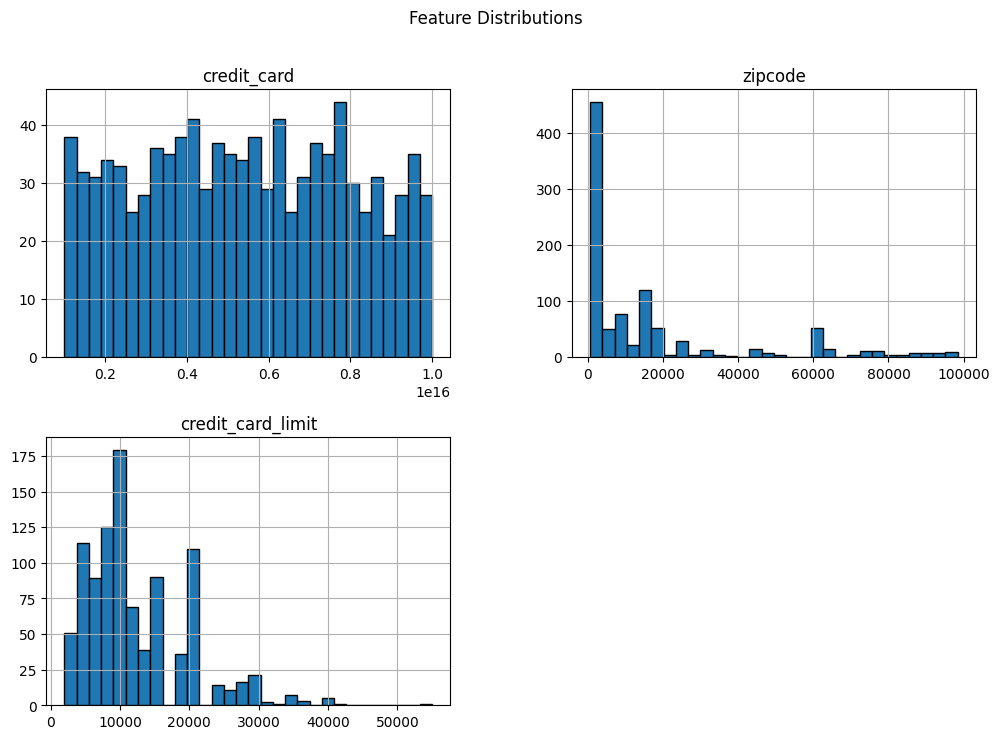

In [15]:
# Distribution of numerical features
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

<Figure size 1200x600 with 0 Axes>

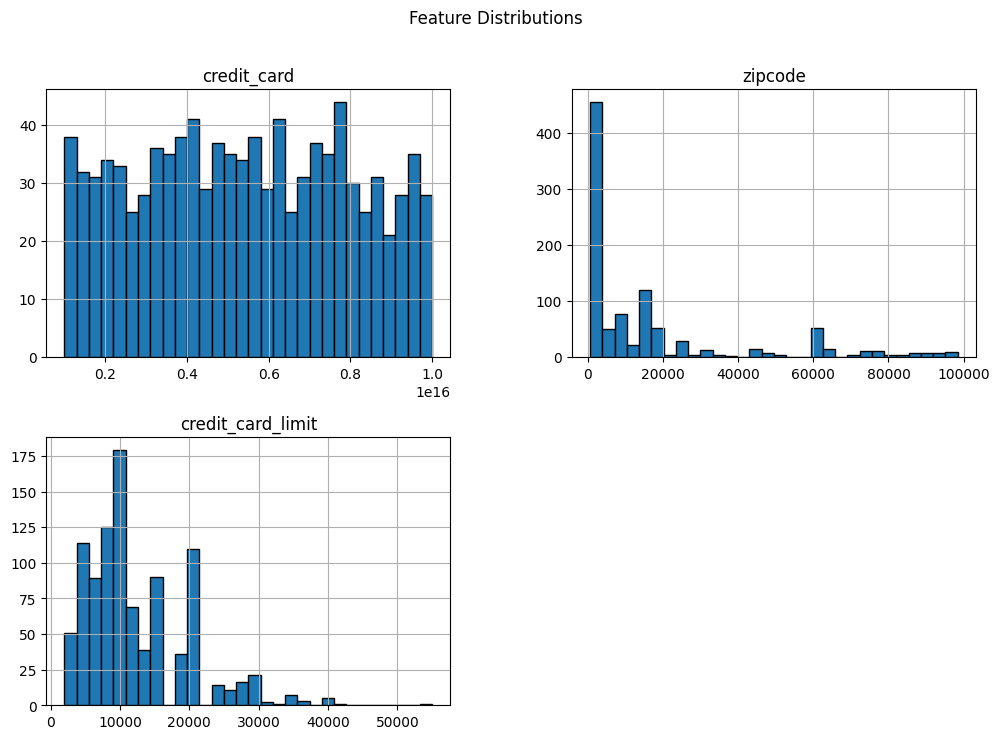

In [16]:
# Distribution of numerical features
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

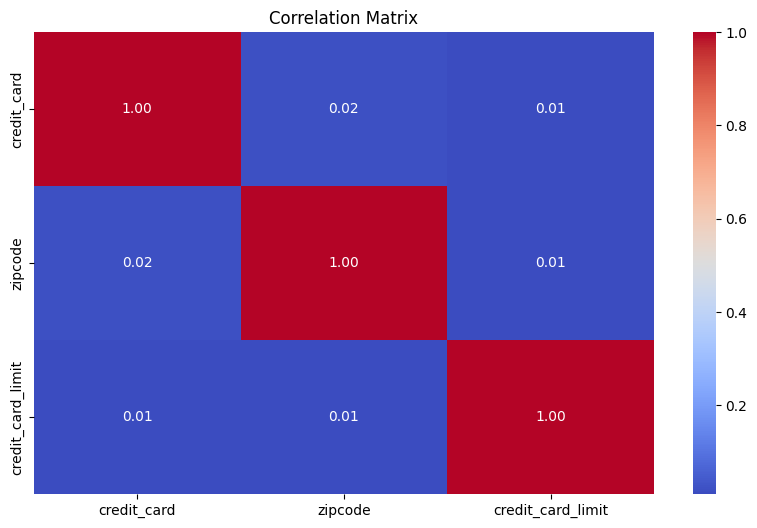

In [17]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

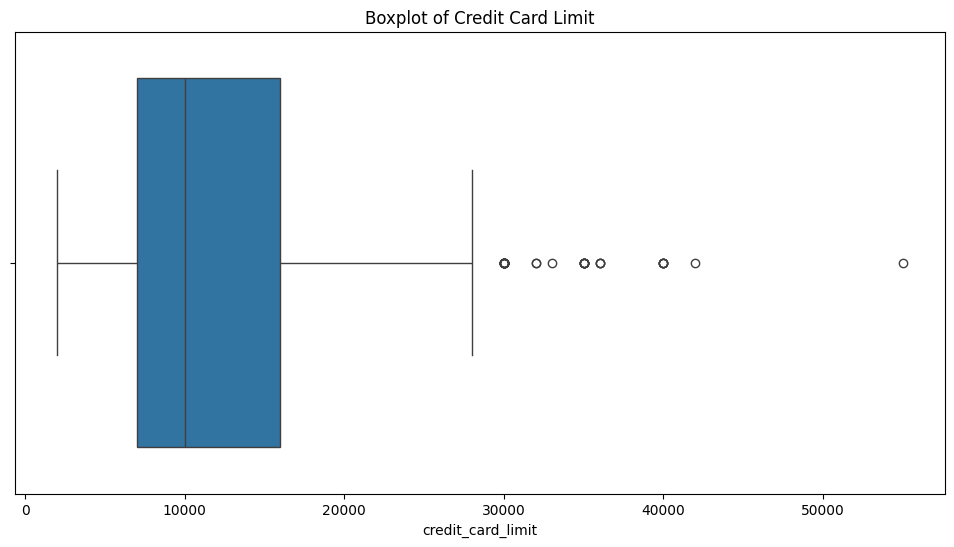

In [18]:
# Boxplots for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["credit_card_limit"])
plt.title("Boxplot of Credit Card Limit")
plt.show()

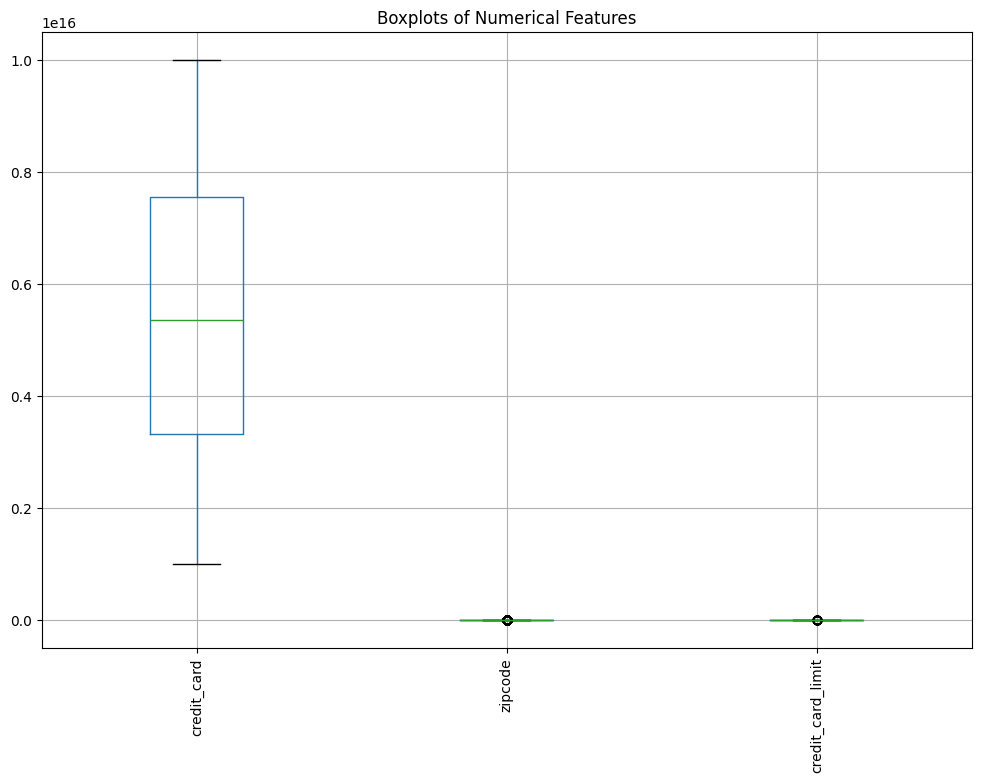

In [19]:
# Boxplots for all numerical features
plt.figure(figsize=(12, 8))
df.select_dtypes(include=[np.number]).boxplot(rot=90)
plt.title("Boxplots of Numerical Features")
plt.show()

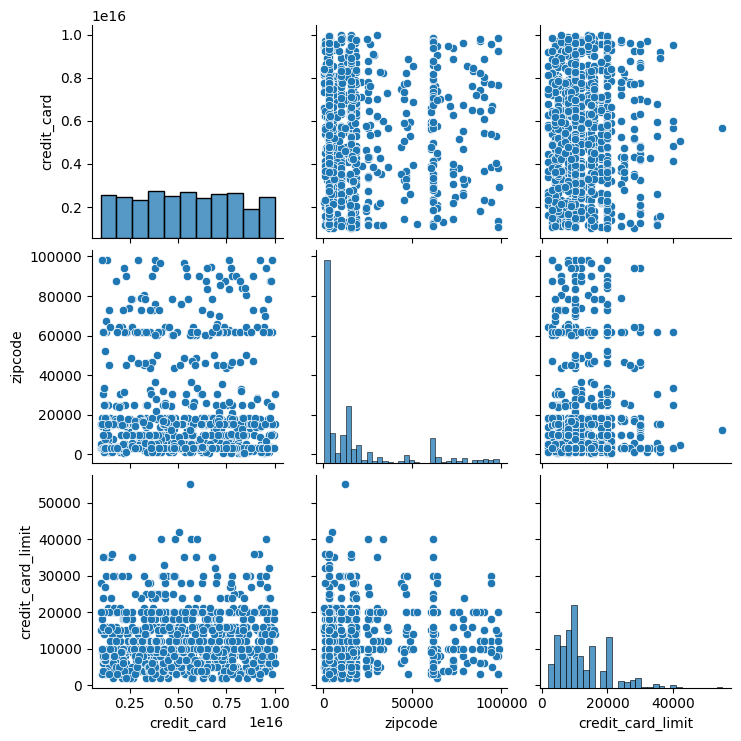

In [20]:
# Pairplot to see relationships
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

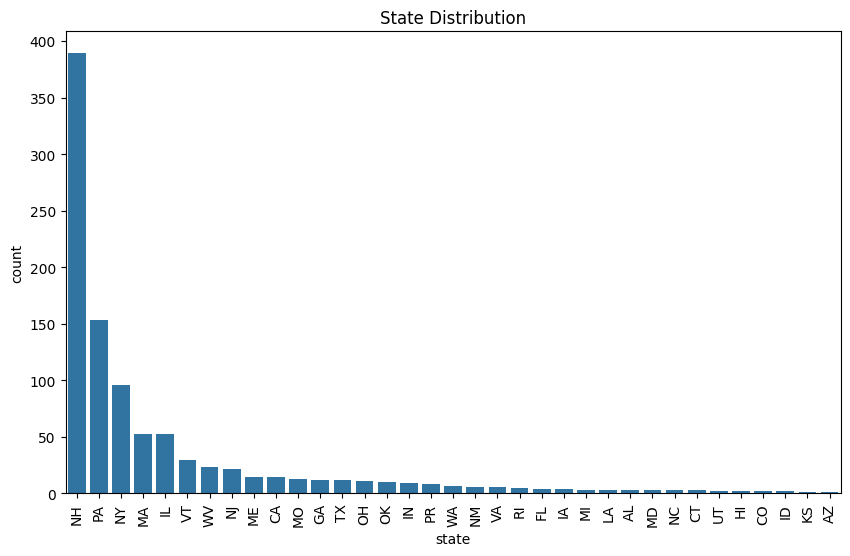

In [21]:
# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x=df['state'], order=df['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title("State Distribution")
plt.show()


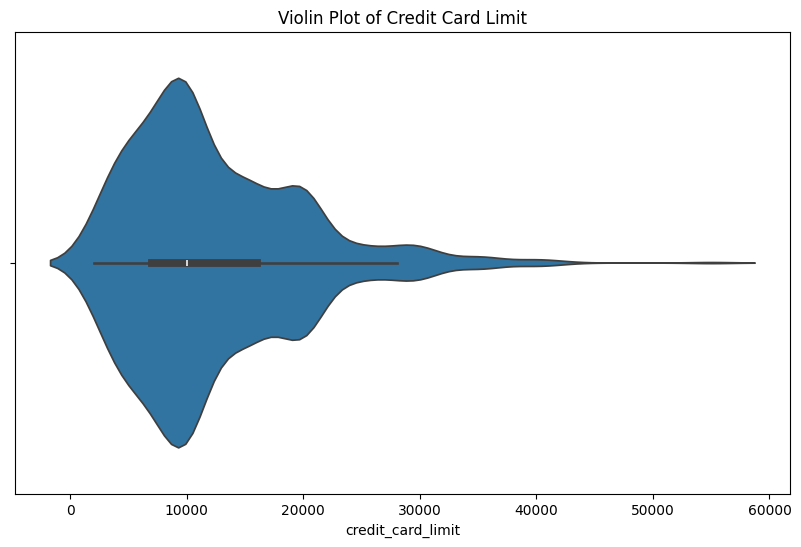

In [22]:
# Violin plot to analyze distribution with outliers
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["credit_card_limit"])
plt.title("Violin Plot of Credit Card Limit")
plt.show()

In [23]:
# Drop unnecessary columns
X = df.drop(columns=["credit_card", "credit_card_limit"])
y = df["credit_card_limit"]

# Define categorical and numerical features
categorical_features = ["city", "state"]
numerical_features = ["zipcode"]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
])


In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Detect outliers using IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df["credit_card_limit"] >= lower_bound) & (df["credit_card_limit"] <= upper_bound)]
X_no_outliers = df_no_outliers.drop(columns=["credit_card", "credit_card_limit"])
y_no_outliers = df_no_outliers["credit_card_limit"]

# Split cleaned data
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Define ML models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor(random_state=42, max_iter=500),
}

# Function to train and evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "R2 Score": r2_score(y_test, y_pred),
        }
    return pd.DataFrame(results).T

# Evaluate models with outliers
results_with_outliers = evaluate_models(models, X_train, X_test, y_train, y_test)

# Evaluate models without outliers
results_without_outliers = evaluate_models(models, X_train_no, X_test_no, y_train_no, y_test_no)

# Display results
print("Results with outliers:\n", results_with_outliers)
print("Results without outliers:\n", results_without_outliers)



Results with outliers:
                             MAE           MSE  R2 Score
Linear Regression   6271.197384  7.250444e+07 -0.094760
Ridge Regression    6232.253463  7.119810e+07 -0.075035
Lasso Regression    6222.653344  7.129872e+07 -0.076555
Decision Tree       6220.884579  7.129554e+07 -0.076507
Random Forest       6238.960520  7.264967e+07 -0.096953
Gradient Boosting   6150.375164  6.905256e+07 -0.042639
Extra Trees         6229.965554  7.137786e+07 -0.077750
KNN                 6378.680203  7.836000e+07 -0.183175
MLP                11787.645615  2.056646e+08 -2.105374
Results without outliers:
                             MAE           MSE  R2 Score
Linear Regression   5209.927595  4.408203e+07 -0.123958
Ridge Regression    5117.796938  4.277218e+07 -0.090561
Lasso Regression    5159.195402  4.334962e+07 -0.105284
Decision Tree       5189.969848  4.390686e+07 -0.119492
Random Forest       5144.033583  4.327933e+07 -0.103492
Gradient Boosting   5024.405214  4.100152e+07 -0.0454

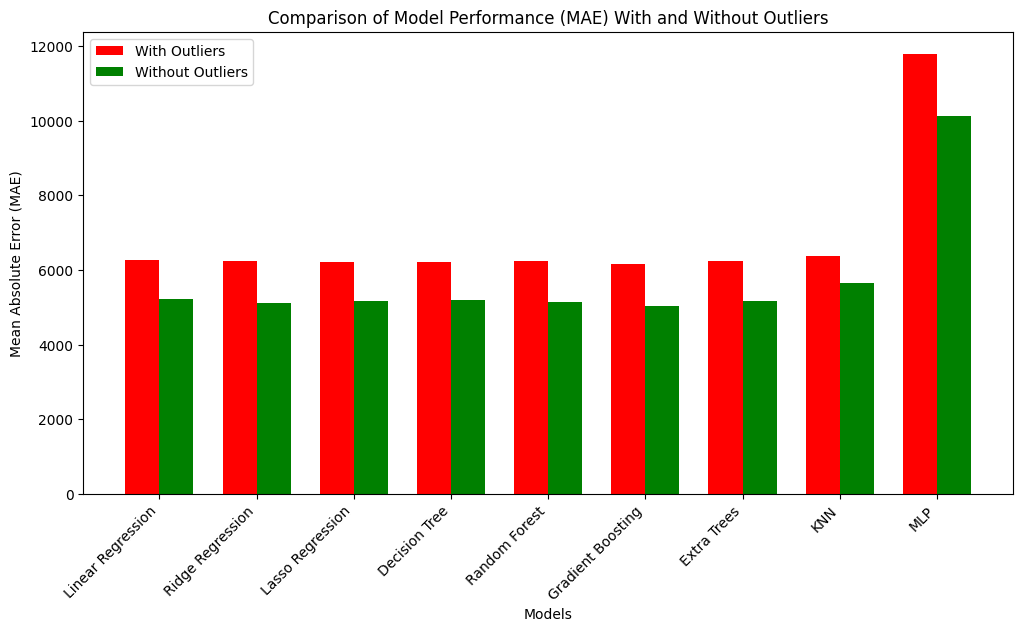

In [25]:
# Visualizing model performance comparison
models_list = list(results_with_outliers.index)
mae_with = results_with_outliers["MAE"].values
mae_without = results_without_outliers["MAE"].values
r2_with = results_with_outliers["R2 Score"].values
r2_without = results_without_outliers["R2 Score"].values

# Bar plot for MAE comparison
x = np.arange(len(models_list))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, mae_with, width, label="With Outliers", color="red")
plt.bar(x + width/2, mae_without, width, label="Without Outliers", color="green")

plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Model Performance (MAE) With and Without Outliers")
plt.xticks(ticks=x, labels=models_list, rotation=45, ha="right")
plt.legend()
plt.show()

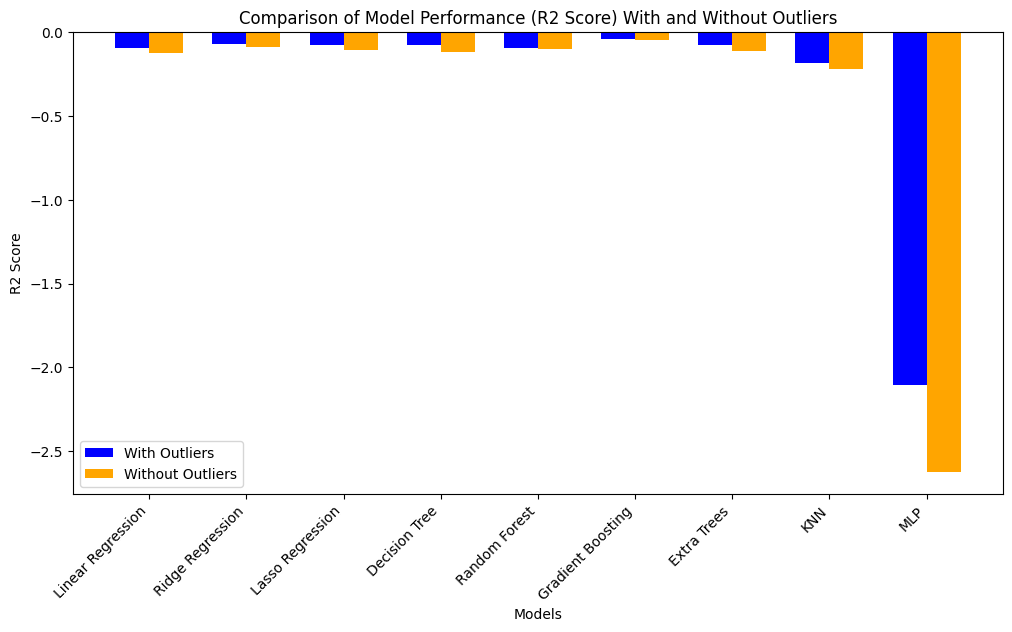

In [26]:
# Bar plot for R2 Score comparison
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, r2_with, width, label="With Outliers", color="blue")
plt.bar(x + width/2, r2_without, width, label="Without Outliers", color="orange")

plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Comparison of Model Performance (R2 Score) With and Without Outliers")
plt.xticks(ticks=x, labels=models_list, rotation=45, ha="right")
plt.legend()
plt.show()
